# Compare the LR results before and after correcting the Gaussian code

In [2]:
import numpy as np
from astropy.table import Table, join
import os
from matplotlib import pyplot as plt

## Load data

In [3]:
old = Table.read("../lofar_pw_pdf.fits")

In [4]:
new = Table.read("../lofar_pw_corSigma2.fits")

In [5]:
len(old)

318769

In [6]:
len(new)

325694

In [7]:
old.colnames

['Source_Name',
 'RA',
 'E_RA',
 'DEC',
 'E_DEC',
 'Peak_flux',
 'E_Peak_flux',
 'Total_flux',
 'E_Total_flux',
 'Maj',
 'E_Maj',
 'Min',
 'E_Min',
 'PA',
 'E_PA',
 'Isl_rms',
 'S_Code',
 'Mosaic_ID',
 'AllWISE',
 'objID',
 'ra',
 'dec',
 'raErr',
 'decErr',
 'W1mag',
 'W1magErr',
 'i',
 'iErr',
 'colour',
 'category',
 'lr',
 'lr_dist']

In [8]:
pwl = join(old, new, 
           join_type='left', 
           keys='Source_Name', 
           uniq_col_name='{col_name}{table_name}', 
           table_names=['_old', '_new'])

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00, 1.3000e+01,
        6.0000e+00, 7.0000e+00, 1.8000e+01, 3.7000e+01, 5.7000e+01,
        8.9000e+01, 1.3600e+02, 2.1500e+02, 3.8800e+02, 7.6600e+02,
        1.3190e+03, 2.7430e+03, 6.5370e+03, 1.6630e+04, 5.0014e+04,
        1.8802e+05, 1.1361e+04, 5.6380e+03, 3.6740e+03, 2.5560e+03,
        1.7790e+03, 1.2510e+03, 9.8700e+02, 6.2100e+02, 4.8600e+02,
        3.4100e+02, 3.0900e+02, 2.3400e+02, 2.1000e+02, 1.5600e+02,
        9.8000e+01, 9.2000e+01, 7.5000e+01, 8.1000e+01, 6.5000e+01,
        3.9000e+01, 2.2000e+01, 1.9000e+01, 1.2000e+01, 6.0000e+00]),
 array([-3736.70262835, -3589.96255223, -3443.22247611, -3296.48239999,
        -3149.74232388, -3003.00224776, -2856.26217164, -2709.52209552,
        -2562.7820194 , -2416.04194328, -2269.30186716, -2122.56179104,
        -1975.82171492, -1829.08163881, -1682.34156269, -1535.60148657,
        -1388.86141045, -1242.

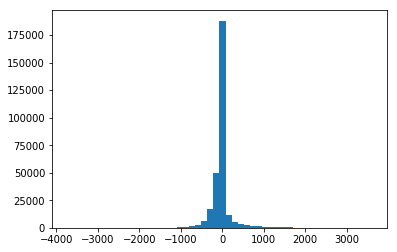

In [9]:
A = pwl["lr_new"]-pwl["lr_old"]
plt.hist(A[~np.isnan(A)], bins=50)

In [10]:
cond_equal = (pwl['ra_old'] == pwl['ra_new']) & (pwl['dec_old'] == pwl['dec_new'])

In [11]:
# Galaxies with the same id (or lack of id)
np.sum(cond_equal)

304456

In [12]:
len(pwl) - np.sum(cond_equal)

14315

In [13]:
len(pwl[cond_equal & np.isnan(pwl["lr_new"])])

12679

In [14]:
pwl[~cond_equal & ~np.isnan(pwl["lr_new"]) & ~pwl["lr_new"].mask]["Source_Name", "lr_new", "lr_old"]

Source_Name,lr_new,lr_old
bytes22,float64,float64
ILTJ104342.76+514429.5,0.16371812388139326,5.537339232287084
ILTJ104347.01+523145.1,6.3356148447456215,nan
ILTJ104402.61+520559.3,0.8487011081136199,0.24317063290041152
ILTJ104408.30+520810.1,0.6829406657567488,44.87985693105901
ILTJ104430.21+515641.4,3.243677353089976,nan
ILTJ104438.12+521539.4,1.4157836636428658,nan
ILTJ104441.57+522653.1,190.922771830242,nan
ILTJ104452.36+515310.9,0.012839376548004511,6.155546925231096
ILTJ104453.73+523335.7,0.5383814489687626,37.752436707272736


In [15]:
condition_matchold_nomatchnew = (
    ~cond_equal & 
    (pwl["lr_old"] >= 0.639) & 
    (np.isnan(pwl["lr_new"]) | 
    pwl["lr_new"].mask |
    (pwl["lr_new"] < 0.601))
)
condition_nomatchold_matchnew = (
    ~cond_equal & 
    ((pwl["lr_old"] < 0.639) | np.isnan(pwl["lr_old"])) &
    ~np.isnan(pwl["lr_new"]) & 
    ~pwl["lr_new"].mask &
    (pwl["lr_new"] >= 0.601)
    )
condition_matchold_matchnew = (
    ~cond_equal & 
    (pwl["lr_old"] >= 0.639) &
    ~np.isnan(pwl["lr_new"]) & 
    ~pwl["lr_new"].mask &
    (pwl["lr_new"] >= 0.601)
    )

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)
/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


In [16]:
len(pwl[condition_matchold_nomatchnew])

4302

In [17]:
len(pwl[condition_nomatchold_matchnew])

4842

In [18]:
len(pwl[condition_matchold_matchnew])

434

In [19]:
cat, counts = np.unique(pwl[condition_nomatchold_matchnew]["category_new"], return_counts=True)

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


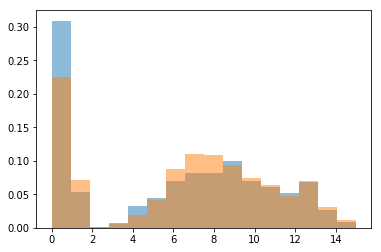

In [20]:
plt.hist(pwl["category_new"][pwl["category_new"] != 1e20], bins=16, alpha=0.5, normed=True)
plt.hist(pwl[condition_nomatchold_matchnew]["category_new"], bins=16, alpha=0.5, normed=True);

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


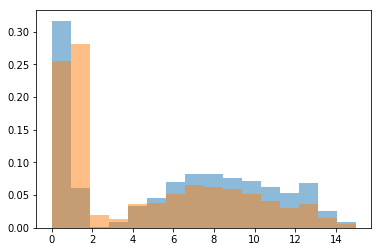

In [21]:
plt.hist(pwl["category_old"][pwl["category_old"] != 1e20], bins=16, alpha=0.5, normed=True)
plt.hist(pwl[condition_matchold_nomatchnew]["category_old"], bins=16, alpha=0.5, normed=True);

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


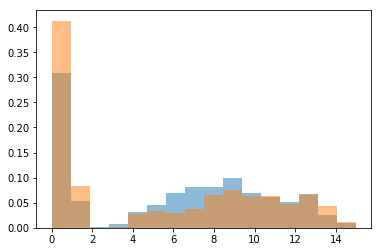

In [22]:
plt.hist(pwl["category_new"][pwl["category_new"] != 1e20], bins=16, alpha=0.5, normed=True)
plt.hist(pwl[condition_matchold_matchnew]["category_new"], bins=16, alpha=0.5, normed=True);

## Comparison with the released dataset

In [23]:
released = Table.read("../data/LOFAR_HBA_T1_DR1_merge_ID_optical_f_v1.2.fits")

In [24]:
len(released)

318520

In [25]:
len(new)

325694

In [26]:
new_rel = join(released, new, 
           join_type='left', 
           keys='Source_Name', 
           uniq_col_name='{col_name}{table_name}', 
           table_names=['_rel', '_new'])

In [27]:
len(new_rel)

318521

In [28]:
new_rel.colnames

['Source_Name',
 'RA_rel',
 'E_RA_rel',
 'DEC_rel',
 'E_DEC_rel',
 'Peak_flux_rel',
 'E_Peak_flux_rel',
 'Total_flux_rel',
 'E_Total_flux_rel',
 'Maj_rel',
 'E_Maj_rel',
 'Min_rel',
 'E_Min_rel',
 'DC_Maj',
 'E_DC_Maj',
 'DC_Min',
 'E_DC_Min',
 'PA_rel',
 'E_PA_rel',
 'DC_PA',
 'E_DC_PA',
 'Isl_rms_rel',
 'S_Code_rel',
 'Mosaic_ID_rel',
 'Masked_Fraction',
 'ID_flag',
 'ID_name',
 'ID_ra',
 'ID_dec',
 'ML_LR',
 'LGZ_Size',
 'LGZ_Width',
 'LGZ_PA',
 'LGZ_Assoc',
 'LGZ_Assoc_Qual',
 'LGZ_ID_Qual',
 'Deblended_from',
 'AllWISE_rel',
 'objID_rel',
 'gFApFlux',
 'gFApFluxErr',
 'gFApMag',
 'gFApMagErr',
 'rFApFlux',
 'rFApFluxErr',
 'rFApMag',
 'rFApMagErr',
 'iFApFlux',
 'iFApFluxErr',
 'iFApMag',
 'iFApMagErr',
 'zFApFlux',
 'zFApFluxErr',
 'zFApMag',
 'zFApMagErr',
 'yFApFlux',
 'yFApFluxErr',
 'yFApMag',
 'yFApMagErr',
 'gFPSFFlux',
 'gFPSFFluxErr',
 'rFPSFFlux',
 'rFPSFFluxErr',
 'iFPSFFlux',
 'iFPSFFluxErr',
 'zFPSFFlux',
 'zFPSFFluxErr',
 'yFPSFFlux',
 'yFPSFFluxErr',
 'gFKronFlux',


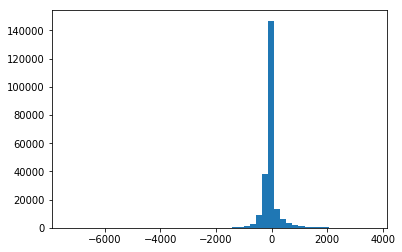

In [29]:
A = new_rel["lr"]-new_rel["ML_LR"]
plt.hist(A[~np.isnan(A)], bins=50);

In [30]:
cond_equal_rel = (new_rel['ID_ra'] == new_rel['ra']) & (new_rel['ID_dec'] == new_rel['dec'])

In [31]:
np.sum(cond_equal_rel)

221741

In [32]:
n, c = np.unique(new_rel[cond_equal_rel]["ID_flag"], return_counts=True)
for i, no in enumerate(n):
    print(no, c[i])

1 217865
2 818
31 2570
32 25
41 437
42 26


In [33]:
n, c = np.unique(new_rel[~cond_equal_rel]["ID_flag"], return_counts=True)
for i, no in enumerate(n):
    print(no, c[i])

0 3401
1 81866
2 147
31 7649
32 1745
41 1612
42 360


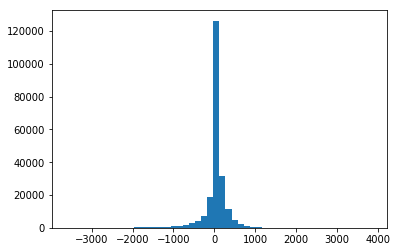

In [34]:
#new_rel[cond_equal_rel]["ML_LR"]-new_rel[cond_equal_rel]["lr"]
A = new_rel[cond_equal_rel]["ML_LR"]-new_rel[cond_equal_rel]["lr"]
plt.hist(A[~np.isnan(A)], bins=50);

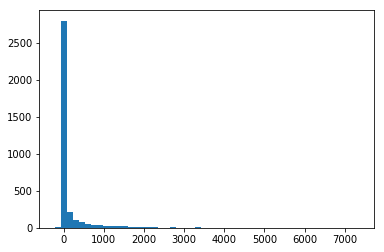

In [35]:
#new_rel[cond_equal_rel]["ML_LR"]-new_rel[cond_equal_rel]["lr"]
A = new_rel[~cond_equal_rel]["ML_LR"]-new_rel[~cond_equal_rel]["lr"]
plt.hist(A[~np.isnan(A)], bins=50);

3516


/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


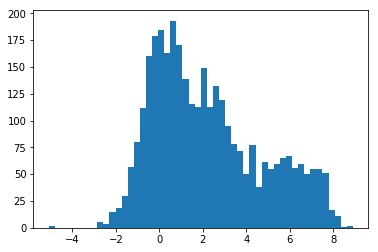

In [36]:
A = new_rel[~cond_equal_rel]["ML_LR"]-new_rel[~cond_equal_rel]["lr"]
print(len(A[~np.isnan(A)]))
plt.hist(np.log(A[~np.isnan(A) & (A > 0)]), bins=50);

In [37]:
new_rel[~cond_equal_rel & 
        (new_rel["ID_flag"] == 1) &
        ~np.isnan(new_rel["ML_LR"])
       ]['Source_Name', 
         'ID_ra', 'ID_dec', 'ra', 'dec', 
         'ML_LR', 'lr',
         'AllWISE_rel', 'objID_rel', 'AllWISE_new', 'objID_new']

Source_Name,ID_ra,ID_dec,ra,dec,ML_LR,lr,AllWISE_rel,objID_rel,AllWISE_new,objID_new
bytes22,float64,float64,float64,float64,float64,float64,bytes19,int64,bytes19,int64
ILTJ104342.76+514429.5,160.9277465,51.7417131,1e+20,1e+20,5.537339232287084,0.16371812388139326,J104342.65+514430.1,--,N/A,999999
ILTJ104408.30+520810.1,161.03902868,52.13662989,161.03416622,52.13575063,44.87985693105901,0.6829406657567488,J104409.36+520811.8,170561610391084676,J104408.23+520809.0,170561610341853607
ILTJ104452.36+515310.9,161.2152109,51.8851658,1e+20,1e+20,6.155546925231096,0.012839376548004511,J104451.65+515306.5,--,N/A,999999
ILTJ104453.73+523335.7,161.2224991,52.5597151,1e+20,1e+20,37.752436707272736,0.5383814489687626,J104453.39+523334.9,--,N/A,999999
ILTJ104526.17+520219.0,161.3594484,52.04066965,1e+20,1e+20,4.746462153667252,0.4617324165951388,J104526.26+520226.1,170441613593829411,N/A,999999
ILTJ104536.42+513559.4,161.40177011,51.60013845,161.4021373,51.600998,23.942246037407507,9.02197467263449,N/A,169921614018530873,J104536.51+513603.5,999999
ILTJ104602.28+520325.8,161.50791259,52.05742772,1e+20,1e+20,1.3498601639121925,0.19212989148891213,N/A,170461615079489572,N/A,999999
ILTJ104632.62+511440.5,161.6359099,51.2443176,1e+20,1e+20,29.849905273084016,0.21605703903076048,J104632.61+511439.5,--,N/A,999999
ILTJ104636.57+535130.4,161.65455634,53.85782169,1e+20,1e+20,3.529148367928834,0.5168723917869738,J104637.08+535128.2,172631616546810142,N/A,999999


In [40]:
new_rel[~cond_equal_rel & 
        (new_rel["ID_flag"] == 1) &
        np.isnan(new_rel["ML_LR"]) &
        (new_rel["lr"] >= 0.601)
       ]['Source_Name', 
         'ID_ra', 'ID_dec', 'ra', 'dec', 
         'ML_LR', 'lr',
         'AllWISE_rel', 'objID_rel', 'AllWISE_new', 'objID_new']

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


Source_Name,ID_ra,ID_dec,ra,dec,ML_LR,lr,AllWISE_rel,objID_rel,AllWISE_new,objID_new
bytes22,float64,float64,float64,float64,float64,float64,bytes19,int64,bytes19,int64
ILTJ104402.61+520559.3,nan,nan,161.01321751,52.10025142,nan,0.8487011081136199,,--,J104403.13+520600.7,170521610133431106
ILTJ104626.33+520514.1,nan,nan,161.6101856,52.0865205,nan,9.630834382892596,,--,J104626.44+520511.4,999999
ILTJ104725.04+522851.0,nan,nan,161.85513889,52.48121887,nan,0.9872251818981672,,--,J104725.12+522852.0,170971618551698320
ILTJ104729.94+523538.1,nan,nan,161.87471304,52.5932495,nan,2.134796697568764,,--,J104729.95+523537.6,171111618747362594
ILTJ104807.84+535523.3,nan,nan,162.031823,53.922524,nan,1.678013435179235,,--,J104807.63+535521.0,999999
ILTJ104849.81+480921.9,nan,nan,162.2089545,48.15628722,nan,5.771863405620874,,--,J104849.93+480922.2,165781622090058223
ILTJ104907.94+514559.6,nan,nan,162.2824885,51.7660243,nan,0.7525892172341231,,--,J104907.79+514557.6,999999
ILTJ104915.69+480621.7,nan,nan,162.31561874,48.1071124,nan,1.9700114885007287,,--,J104915.72+480625.4,165721623156619228
ILTJ104941.76+471111.7,nan,nan,162.42308343,47.18630098,nan,0.6154948514438827,,--,N/A,164621624230964302


In [42]:
new_rel[~cond_equal_rel & 
        (new_rel["ID_flag"] == 1) &
        ~np.isnan(new_rel["ML_LR"]) &
        (new_rel["lr"] >= 0.601)
       ]['Source_Name', "cat"

#['Source_Name', 
#         'ID_ra', 'ID_dec', 'ra', 'dec', 
#         'ML_LR', 'lr',
#         'AllWISE_rel', 'objID_rel', 'AllWISE_new', 'objID_new']

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


Source_Name,ID_ra,ID_dec,ra,dec,ML_LR,lr,AllWISE_rel,objID_rel,AllWISE_new,objID_new
bytes22,float64,float64,float64,float64,float64,float64,bytes19,int64,bytes19,int64
ILTJ104408.30+520810.1,161.03902868,52.13662989,161.03416622,52.13575063,44.87985693105901,0.6829406657567488,J104409.36+520811.8,170561610391084676,J104408.23+520809.0,170561610341853607
ILTJ104536.42+513559.4,161.40177011,51.60013845,161.4021373,51.600998,23.942246037407507,9.02197467263449,N/A,169921614018530873,J104536.51+513603.5,999999
ILTJ104900.69+531754.5,162.25432702,53.29846533,162.25191328,53.29869858,252.15333165972388,22.347861368745498,J104900.99+531754.8,171951622543668960,J104900.22+531755.9,171951622519829158
ILTJ105126.64+512419.6,162.86096615,51.40539059,162.8613191,51.406204,33.34066790400077,13.607429049811778,N/A,169681628609997203,J105126.71+512422.3,999999
ILTJ105140.07+533717.8,162.91714356,53.6216557,162.91718682,53.62237582,16.161746312858988,59.79277370951574,N/A,172341629170686397,J105140.11+533719.7,172341629172017745
ILTJ105219.97+465300.7,163.0842367,46.8838075,163.0817154,46.8839099,39.67212091324443,1.0372302172353316,J105220.21+465301.7,--,J105219.61+465302.0,999999
ILTJ105305.54+532038.8,163.27300403,53.34494172,163.27079312,53.34469974,1.6263624862819794,1.3058098357994128,N/A,172011632730474659,J105305.16+532040.9,172011632708354375
ILTJ105337.96+484341.7,163.40691547,48.7284473,163.406306,48.7277752,3.3388444728767688,0.9283329005523906,N/A,166471634068224767,J105337.51+484339.9,999999
ILTJ105356.36+502805.1,163.48488585,50.46823768,163.4845896,50.4674726,18.461695514702665,22.170445192725865,N/A,168561634848962557,J105356.30+502802.9,999999


In [43]:
new_rel[~cond_equal_rel & 
        (new_rel["ID_flag"] != 1) &
        np.isnan(new_rel["ML_LR"]) &
        (new_rel["lr"] >= 0.601)
       ]['Source_Name', 
         'ID_ra', 'ID_dec', 'ra', 'dec', 
         'ML_LR', 'lr',
         'AllWISE_rel', 'objID_rel', 'AllWISE_new', 'objID_new']

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


Source_Name,ID_ra,ID_dec,ra,dec,ML_LR,lr,AllWISE_rel,objID_rel,AllWISE_new,objID_new
bytes22,float64,float64,float64,float64,float64,float64,bytes19,int64,bytes19,int64
ILTJ104324.59+520940.6,160.852818,52.1633518,--,--,nan,--,J104324.67+520948.0,--,--,--
ILTJ104416.07+514856.3,nan,nan,161.06550381,51.81457981,nan,0.8415016990170879,,--,J104415.74+514853.7,170171610655238222
ILTJ104438.12+521539.4,161.16096728,52.26041943,161.15876045,52.26146925,nan,1.4157836636428658,J104438.60+521537.4,170711611610293207,N/A,170711611588574487
ILTJ104445.73+512432.7,nan,nan,--,--,nan,--,,--,--,--
ILTJ104446.61+515809.9,nan,nan,161.19434083,51.96981773,nan,1.8333573969635009,,--,J104446.56+515810.5,170361611943154515
ILTJ104450.87+513440.6,161.21347655,51.57830926,--,--,nan,--,J104451.21+513442.4,169891612135234672,--,--
ILTJ104457.95+520959.8,nan,nan,161.24211191,52.16710304,nan,1.0705149777214265,,--,J104458.08+521000.9,170601612421661249
ILTJ104521.56+521723.3,nan,nan,161.34062342,52.29014906,nan,0.9101795825549296,,--,J104521.77+521724.7,170741613406578878
ILTJ104524.38+515747.5,nan,nan,161.35134192,51.96323531,nan,4.771331238318556,,--,N/A,170351613513816587


In [44]:
def compute_phi(radio_ra, radio_dec, opt_ra, opt_dec):
    """Compute the angle (in radians) between two sources
    """
    cosadj = np.cos(np.deg2rad(0.5*(radio_dec + opt_dec)))
    phi = np.arctan2(((opt_ra - radio_ra)*cosadj), (opt_dec - radio_dec))
    return phi

In [52]:
new_rel["phi_old"] = np.rad2deg(compute_phi(new_rel["RA_rel"], new_rel["DEC_rel"], new_rel["ID_ra"], new_rel["ID_dec"]))

In [53]:
new_rel["phi_new"] = np.rad2deg(compute_phi(new_rel["RA_rel"], new_rel["DEC_rel"], new_rel["ra"], new_rel["dec"]))

In [55]:
changes = new_rel[~cond_equal_rel & 
        (new_rel["ID_flag"] == 1) &
        ~np.isnan(new_rel["ML_LR"]) &
        (new_rel["lr"] >= 0.601)
       ]
#["Source_Name", "phi_old", "phi_new", "PA_rel",  "Maj_rel", "lr", "ML_LR"]

/home/jsm/programs/soft/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater_equal
  return getattr(self.data, op)(other)


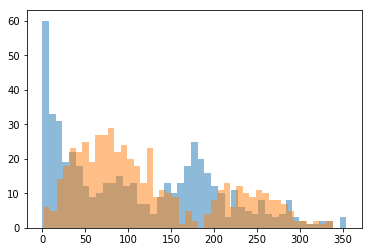

In [60]:
plt.hist(np.abs(changes["phi_old"] - changes["PA_rel"]), bins=45, alpha=0.5);
plt.hist(np.abs(changes["phi_new"] - changes["PA_rel"]), bins=45, alpha=0.5);

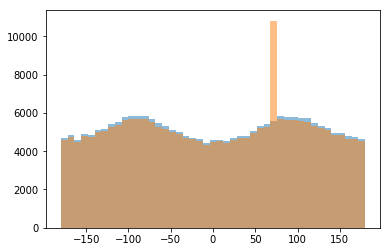

In [76]:
plt.hist(new_rel["phi_old"][~np.isnan(new_rel["phi_old"])], bins=45, alpha=0.5);
plt.hist(new_rel["phi_new"][~np.isnan(new_rel["phi_new"])& (new_rel["ra"] != 1e20)], bins=45, alpha=0.5);

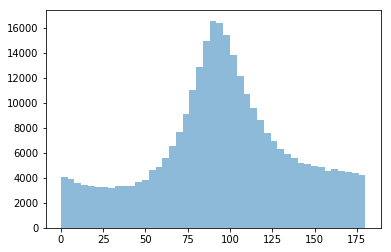

In [81]:
plt.hist(new_rel["PA_rel"][~np.isnan(new_rel["PA_rel"])], bins=45, alpha=0.5);

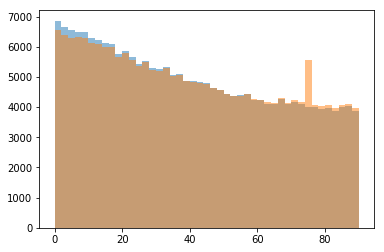

In [88]:
cond1 = ~np.isnan(new_rel["phi_old"]) & ~np.isnan(new_rel["PA_rel"])
angle = np.abs(new_rel["phi_old"][cond1] - new_rel["PA_rel"][cond1])
angle[angle >= 180] = angle[angle >= 180] - 180
angle[angle >= 90] = 180 - angle[angle >= 90]
plt.hist(angle, bins=45, alpha=0.5);
cond2 = ~np.isnan(new_rel["phi_new"]) & ~np.isnan(new_rel["PA_rel"])
angle2 = np.abs(new_rel["phi_new"][cond1] - new_rel["PA_rel"][cond1])
angle2[angle2 >= 180] = angle2[angle2 >= 180] - 180
angle2[angle2 >= 90] = 180 - angle2[angle2 >= 90]
plt.hist(angle2, bins=45, alpha=0.5);
#plt.hist(np.abs(new_rel["phi_new"] - new_rel["PA_rel"]), bins=45, alpha=0.5);

In [85]:
new_rel["PA_rel"][cond1]

nan
94.63378795805019
141.35908107158016
23.158849328934885
129.2707940997737
62.29326398726961
95.91524804737941
66.5865937637745
160.98002631336445
76.15706035323043
147.00574072007296
